In [6]:
# Load in relevant libraries, and alias where appropriate
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# Define relevant variables for the ML task
batch_size = 64
num_classes = 10
learning_rate = 0.001
num_epochs = 10

# Device will determine whether to run the training on GPU or CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [7]:
#Defining the convolutional neural network
class LeNet5(nn.Module):
    def __init__(self, num_classes):
        super(LeNet5, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Linear(400, 120)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(120, 84)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(84, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.relu(out)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

In [8]:
#Loading the dataset and preprocessing
train_dataset = torchvision.datasets.FashionMNIST(root = './data',
                                           train = True,
                                           transform = transforms.Compose([
                                                  transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.1307,), std = (0.3081,))]),
                                           download = True)


test_dataset = torchvision.datasets.FashionMNIST(root = './data',
                                          train = False,
                                          transform = transforms.Compose([
                                                  transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.1325,), std = (0.3105,))]),
                                          download=True)


train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)


test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

In [9]:
model = LeNet5(num_classes).to(device)

#Setting the loss function
cost = nn.CrossEntropyLoss()

#Setting the optimizer with the model parameters and learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#this is defined to print how many steps are remaining when training
total_step = len(train_loader)

In [10]:
import numpy as np
train_errors=[]
test_errors=[]
total_step = len(train_loader)
for epoch in range(num_epochs):
    iter_errors=[]
    for i, (images, labels) in enumerate(train_loader):  
        images = images.to(device)
        labels = labels.to(device)
        
        #Forward pass
        outputs = model(images)
        loss = cost(outputs, labels)
        	
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_err=loss.item()
        iter_errors.append(train_err)

    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    epoch_err = np.mean(iter_errors)
    train_errors.append(epoch_err)
    test_err=1-( correct / total)
    test_errors.append(test_err)
    print ('Epoch [{}/{}], Iteration [{}/{}], Loss: {:.4f}, Test Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, epoch_err, test_err))



Epoch [1/10], Iteration [938/938], Loss: 0.4720, Test Loss: 0.1316
Epoch [2/10], Iteration [938/938], Loss: 0.3204, Test Loss: 0.1182
Epoch [3/10], Iteration [938/938], Loss: 0.2820, Test Loss: 0.1050
Epoch [4/10], Iteration [938/938], Loss: 0.2604, Test Loss: 0.1039
Epoch [5/10], Iteration [938/938], Loss: 0.2399, Test Loss: 0.1074
Epoch [6/10], Iteration [938/938], Loss: 0.2269, Test Loss: 0.1037
Epoch [7/10], Iteration [938/938], Loss: 0.2130, Test Loss: 0.0983
Epoch [8/10], Iteration [938/938], Loss: 0.1992, Test Loss: 0.0995
Epoch [9/10], Iteration [938/938], Loss: 0.1889, Test Loss: 0.1006
Epoch [10/10], Iteration [938/938], Loss: 0.1766, Test Loss: 0.1033


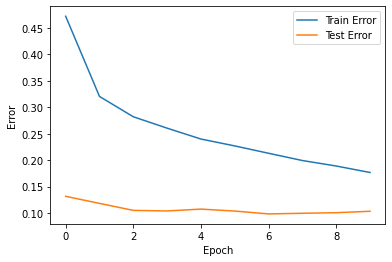

In [11]:
import matplotlib.pyplot as plt

plt.plot(train_errors)
plt.plot(test_errors)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend(["Train Error","Test Error"])
plt.show()

In [12]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
  
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))
	 

Accuracy of the network on the 10000 test images: 89.56 %
